In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Cargar datos
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Mostrar información básica
print("Forma del dataset:", df.shape)
print("\nPrimeras 5 filas:")
df.head()

Forma del dataset: (7043, 21)

Primeras 5 filas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Estadísticas descriptivas
print("\n[INFO] Estadísticas descriptivas de variables numéricas:")
desc_stats = df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()
print(desc_stats)

# Guardar en CSV para el informe
desc_stats.to_csv('../results/descriptive_statistics.csv')


[INFO] Estadísticas descriptivas de variables numéricas:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [2]:
# Reemplazar espacios vacíos en 'TotalCharges' por NaN y convertir a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Imputar TotalCharges con 0 (es razonable: clientes nuevos con 0 cargos totales)
df['TotalCharges'].fillna(0, inplace=True)

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

Valores nulos por columna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Tipos de datos:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBil

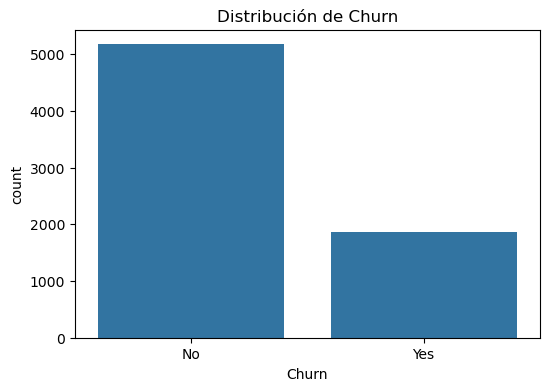

Porcentaje de Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [3]:
# Distribución de Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.show()

# Porcentajes
churn_counts = df['Churn'].value_counts(normalize=True) * 100
print("Porcentaje de Churn:")
print(churn_counts)

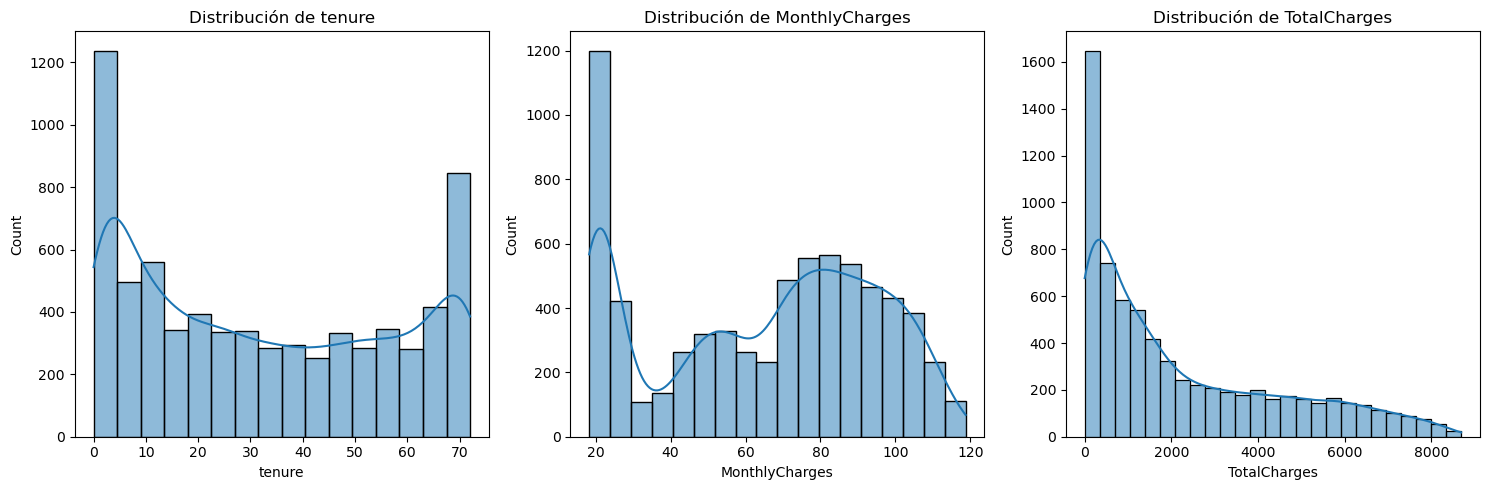

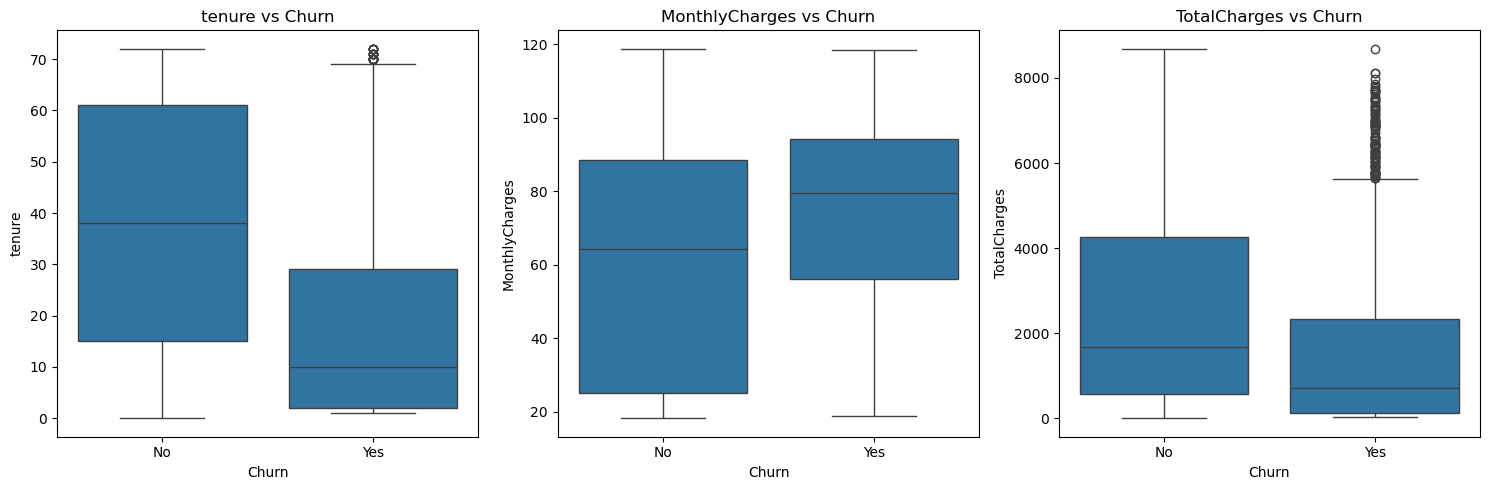

In [4]:
# Variables numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Boxplots por Churn
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

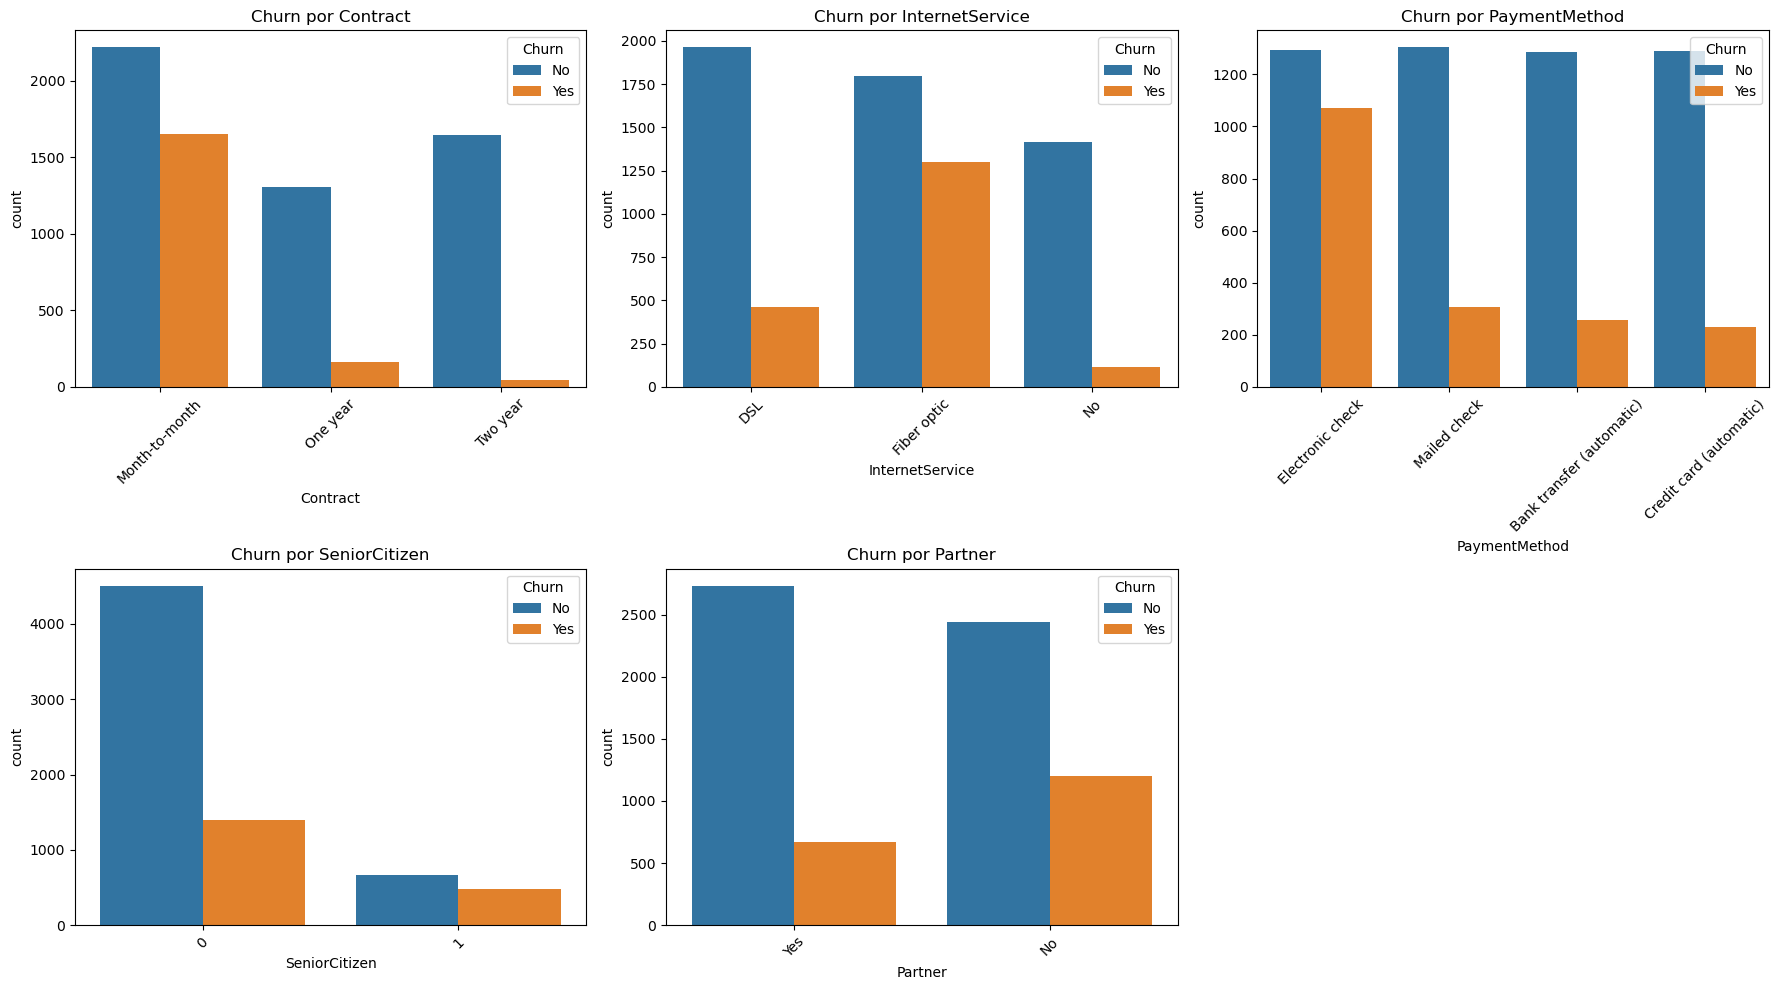

In [5]:
# Variables categóricas importantes
cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen', 'Partner']

plt.figure(figsize=(18, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'Churn por {col}')
plt.tight_layout()
plt.show()

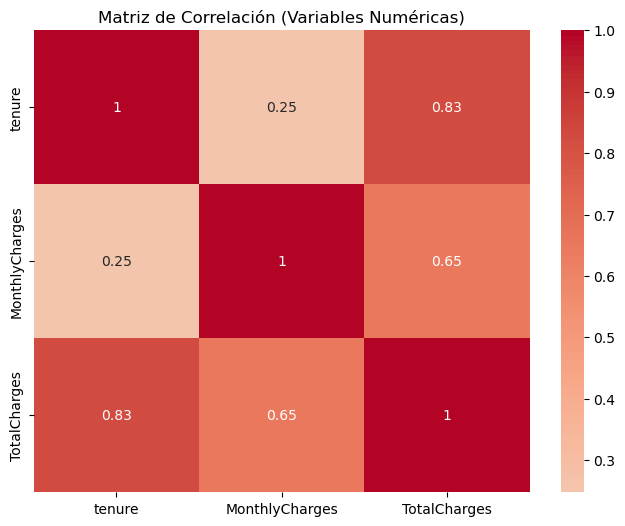

In [6]:
# Correlación entre numéricas
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()

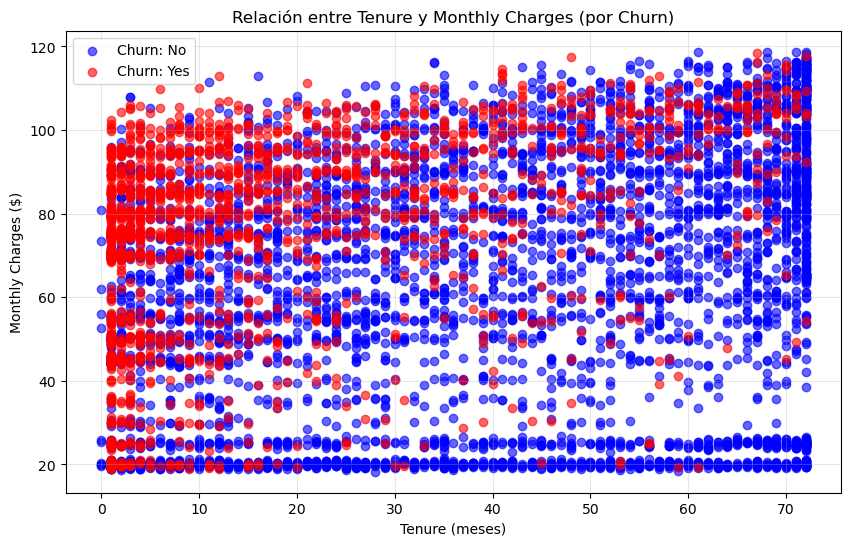

In [8]:
#%%
# Gráfico de dispersión: tenure vs MonthlyCharges (coloreado por Churn)
plt.figure(figsize=(10, 6))
colors = {'No': 'blue', 'Yes': 'red'}
for churn in df['Churn'].unique():
    subset = df[df['Churn'] == churn]
    plt.scatter(subset['tenure'], subset['MonthlyCharges'], 
                c=colors[churn], label=f'Churn: {churn}', alpha=0.6)

plt.title('Relación entre Tenure y Monthly Charges (por Churn)')
plt.xlabel('Tenure (meses)')
plt.ylabel('Monthly Charges ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../results/scatter_tenure_vs_monthly.png', dpi=300, bbox_inches='tight')
plt.show()